In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set()
advertising = pd.read_csv("../../data/advertising.csv", index_col="Unnamed: 0")
scaler = StandardScaler()
advertising[advertising.columns] = scaler.fit_transform(advertising)
advertising.head()

,TV,Radio,Newspaper,Sales
1,0.969852,0.981522,1.778945,1.552053
2,-1.197376,1.082808,0.669579,-0.696046
3,-1.516155,1.528463,1.783549,-0.907406
4,0.052050,1.217855,1.286405,0.860330
5,0.394182,-0.841614,1.281802,-0.215683


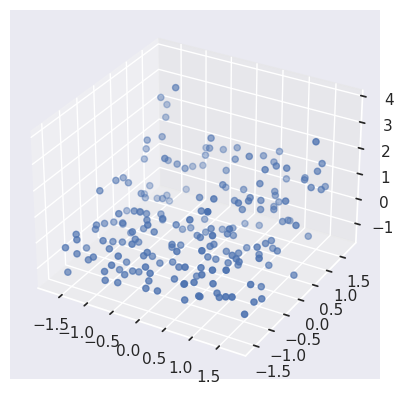

In [2]:
X = advertising[["TV", "Radio", "Newspaper"]].to_numpy()
y = advertising.Sales.to_numpy()
ax= plt.figure().add_subplot(projection = "3d")
ax.scatter3D(X.T[0], X.T[1], X.T[2])

PCA to reduce input dims to 2

[16.55809475 14.02323885]


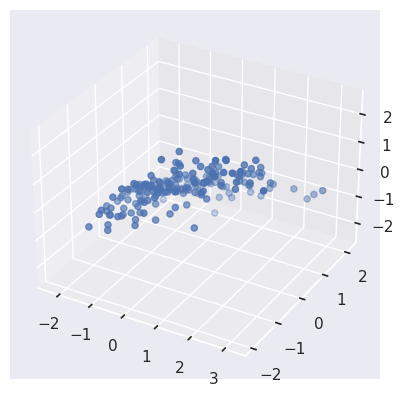

In [3]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)
print(pca.singular_values_)
ax= plt.figure().add_subplot(projection = "3d")
ax.scatter3D(X.T[0], X.T[1], y)

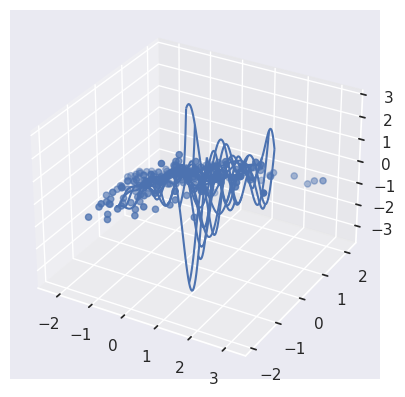

In [4]:

gpr = GaussianProcessRegressor()
%matplotlib inline

def plot_gpr_prediction(gpr, X, y):
    gpr.fit(X, y)
    u = v = np.linspace(X.min().mean()*0.5, X.max().mean()*0.5, 100)
    U, V =np.meshgrid(u, v)
    zs = gpr.predict(np.concatenate([np.expand_dims(np.ravel(U), 1),np.expand_dims(np.ravel(V), 1)], axis=1))
    Z = np.reshape(zs, U.shape)
    ax= plt.figure().add_subplot(projection = "3d")
    ax.scatter3D(X.T[0], X.T[1], y)
    ax.plot_wireframe(U, V, Z, rstride= 10, cstride=10)
plot_gpr_prediction(gpr, X, y)
plt.show()

In [5]:
gpr.get_params()

from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import kernels

gpr2 = GaussianProcessRegressor()

gridsearch = GridSearchCV(gpr2, param_grid={'kernel':[kernels.RBF(l) for l in np.linspace(0, 2, 100)]})

gridsearch.fit(X, y)

/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:285: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:285: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bo

/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better valu

/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better valu

/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better valu

/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better valu

/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better valu

/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better valu

/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better valu

/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better valu

/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better valu

/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/justus/universität/ProbablisticML/ProbML/.conda/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better valu

GridSearchCV(estimator=GaussianProcessRegressor(),
             param_grid={'kernel': [RBF(length_scale=0),
                                    RBF(length_scale=0.0202),
                                    RBF(length_scale=0.0404),
                                    RBF(length_scale=0.0606),
                                    RBF(length_scale=0.0808),
                                    RBF(length_scale=0.101),
                                    RBF(length_scale=0.121),
                                    RBF(length_scale=0.141),
                                    RBF(length_scale=0.162),
                                    RBF(length_scale=0.182),
                                    RBF(length_scale=0.202),
                                    RBF(length_sca...
                                    RBF(length_scale=0.303),
                                    RBF(length_scale=0.323),
                                    RBF(length_scale=0.343),
                                    RBF(length_scale=0.364),
                                    RBF(length_scale=0.384),
                                    RBF(length_scale=0.404),
                                    RBF(length_scale=0.424),
                                    RBF(length_scale=0.444),
                                    RBF(length_scale=0.465),
                                    RBF(length_scale=0.485),
                                    RBF(length_scale=0.505),
                                    RBF(length_scale=0.525),
                                    RBF(length_scale=0.545),
                                    RBF(length_scale=0.566),
                                    RBF(length_scale=0.586), ...]})

In [6]:
pd.DataFrame(gridsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004268,0.002752,0.000543,0.000262,RBF(length_scale=0),{'kernel': RBF(length_scale=0)},-0.000232,-0.014127,-0.015126,-0.033011,-0.001051,-0.012709,0.011930,8
1,0.020881,0.009918,0.000540,0.000117,RBF(length_scale=0.0202),{'kernel': RBF(length_scale=0.0202)},0.261405,0.499545,0.461874,0.238613,0.416961,0.375680,0.106134,5
2,0.025535,0.006498,0.000551,0.000103,RBF(length_scale=0.0404),{'kernel': RBF(length_scale=0.0404)},0.261405,0.499545,0.461874,0.238613,0.416961,0.375680,0.106134,3
3,0.021257,0.002235,0.000479,0.000041,RBF(length_scale=0.0606),{'kernel': RBF(length_scale=0.0606)},0.261405,0.499545,0.461874,0.238613,0.416961,0.375680,0.106134,2
4,0.015251,0.002600,0.000451,0.000024,RBF(length_scale=0.0808),{'kernel': RBF(length_scale=0.0808)},0.261405,0.499545,0.461874,0.238613,0.416961,0.375680,0.106134,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003387,0.000042,0.000435,0.000009,RBF(length_scale=1.92),{'kernel': RBF(length_scale=1.92)},-0.000232,-0.014127,-0.015126,-0.033011,-0.001051,-0.012709,0.011930,8
96,0.004796,0.002487,0.000468,0.000043,RBF(length_scale=1.94),{'kernel': RBF(length_scale=1.94)},-0.000232,-0.014127,-0.015126,-0.033011,-0.001051,-0.012709,0.011930,8
97,0.003463,0.000049,0.000444,0.000031,RBF(length_scale=1.96),{'kernel': RBF(length_scale=1.96)},-0.000232,-0.014127,-0.015126,-0.033011,-0.001051,-0.012709,0.011930,8
98,0.006900,0.005983,0.000459,0.000043,RBF(length_scale=1.98),{'kernel': RBF(length_scale=1.98)},-0.000232,-0.014127,-0.015126,-0.033011,-0.001051,-0.012709,0.011930,8


In [7]:
print(((gpr.predict(X) - y)**2).mean())
gpr2 = gridsearch.best_estimator_
gpr3 = GaussianProcessRegressor(kernel = kernels.RationalQuadratic())
gpr2.fit(X,y)
gpr3.fit(X, y)
print(((gpr2.predict(X) -y)**2).mean())
print(((gpr3.predict(X) -y)**2).mean())

0.05156566398379896
1.76011451876771e-19
6.033358642478105e-20


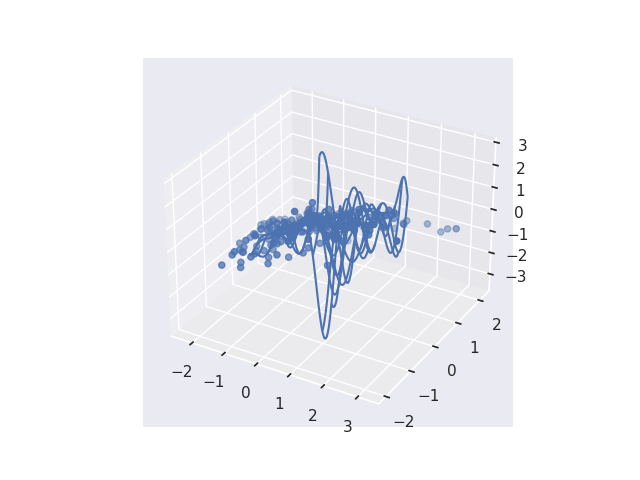

In [8]:
fig = plt.figure()
%matplotlib widget
plot_gpr_prediction(gpr, X, y)
plt.show()

In [13]:
plot_gpr_prediction(gpr2, X, y)

In [12]:
plot_gpr_prediction(gpr3, X,y)

Though the gridsearch result table does not make a lot of sense, the error is significantly lower. However, it seems like simply drawing a plane through the field was better than 